Convert cifar10 data into folder separated pngs

In [6]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [29]:
from fastai.imports import *

In [3]:
PATH = Path("data/cifar10/")
os.makedirs(PATH,exist_ok=True)

In [17]:
def batch_load(file, encoding='bytes'):
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding=encoding)
    return d

In [5]:
batch_path = Path("data/cifar-10-batches-py/")

### Determine labels

In [111]:
labels = batch_load(batch_path/'batches.meta', encoding="ASCII")
labels

{'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_cases_per_batch': 10000,
 'num_vis': 3072}

In [112]:
labels = labels['label_names']
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [121]:
# create folders from labels (in /train)
for label in labels:
    os.makedirs(PATH/'test'/label, exist_ok=True)

In [114]:
!ls {PATH/'train'}

airplane   bird       deer       frog       ship
automobile cat        dog        horse      truck


### explore first batch

In [7]:
batch = batch_load(batch_path/'data_batch_1')

In [8]:
# decode from bytes format
decoded = {}
for k, v in batch.items():
    decoded[k.decode('utf8')] = v

In [10]:
decoded.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [36]:
labels[decoded['labels'][0]]

'frog'

In [97]:
# test save image
def save_test_img(idx):
    fname = decoded['filenames'][idx].decode()
    data = decoded['data'][idx]
    with open(os.path.join(PATH, fname), 'wb') as outfile:
#         img = data.reshape((32, 32, 3), order='F').swapaxes(0,1)
        img = np.transpose(data.reshape(3,32,32), [1,2,0])
        Image.fromarray(img, mode='RGB').save(outfile)
    return fname

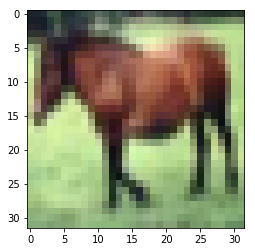

In [106]:
img = decoded['data'][7]
# img = np.transpose(img.reshape(3,32,32), [1,2,0])
img = img.reshape((32, 32, 3), order='F').swapaxes(0,1)
plt.imshow(img)

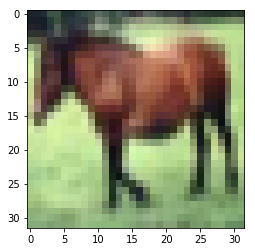

In [108]:
im = Image.fromarray(img, mode='RGB')
plt.imshow(im);
# im

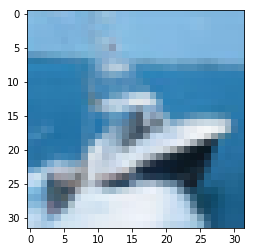

In [104]:
fname = save_test_img(8)
image = Image.open(PATH/fname)
plt.imshow(image)
# image

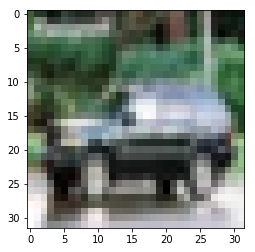

In [105]:
image = Image.open(PATH/'train'/'automobile'/'automobile_s_000378.png')
plt.imshow(image)

In [38]:
# create PNGs from batches
for i,data in enumerate(decoded['data']):
    label = labels[decoded['labels'][i]]
    folder = PATH/'train'/label
        
    fname = decoded['filenames'][i].decode()
    
    with open(os.path.join(folder, fname), 'wb') as outfile:
#         img = data.reshape((32, 32, 3), order='F').swapaxes(0,1)
        img = np.transpose(data.reshape(3,32,32), [1,2,0])
        Image.fromarray(img, mode='RGB').save(outfile)

### Loop to save rest of batches

In [115]:
for idx in range(1,6):
    b_name = batch_path/f'data_batch_{idx}'
    batch = batch_load(b_name)
    
    # decode batch data from bytes format
    decoded = {}
    for k, v in batch.items():
        decoded[k.decode('utf8')] = v
        
    for i,f_name in enumerate(decoded['filenames']):
        label = labels[decoded['labels'][i]]
        folder = PATH/'train'/label
        fname = f_name.decode()
        data = decoded['data'][i]
        
        with open(os.path.join(folder, fname), 'wb') as outfile:
            # img = data.reshape((32, 32, 3), order='F').swapaxes(0,1)
            img = np.transpose(data.reshape(3,32,32), [1,2,0])
            Image.fromarray(img, mode='RGB').save(outfile)
        
#     total.update(batch)

In [124]:
!ls {PATH}/train/cat/ | wc -l

    5000


### Save test batch

In [116]:
batch = batch_load(batch_path/'test_batch')

In [117]:
# decode from bytes format
decoded = {}
for k, v in batch.items():
    decoded[k.decode('utf8')] = v

In [120]:
decoded['labels']

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [122]:
for i,data in enumerate(decoded['data']):
    label = labels[decoded['labels'][i]]
    folder = PATH/'test'/label
        
    fname = decoded['filenames'][i].decode()
    
    with open(os.path.join(folder, fname), 'wb') as outfile:
#         img = data.reshape((32, 32, 3), order='F').swapaxes(0,1)
        img = np.transpose(data.reshape(3,32,32), [1,2,0])
        Image.fromarray(img, mode='RGB').save(outfile)

In [123]:
!ls {PATH}/test/cat/ | wc -l

    1000


### Find mean/std for each channel of all training images

In [129]:
data = []
for i in range(1,6):
    batch = batch_load(batch_path/f'data_batch_{i}')
    data.append(batch[b'data'])

In [138]:
d = np.concatenate(data)
d.shape

(50000, 3072)

In [149]:
q = d.reshape(-1,3,32,32)

In [150]:
# get the mean of the color channels (combine other two axes) and divide by 256
np.mean(q, axis=(0,2,3))/256

array([ 0.48948,  0.48027,  0.44479])

In [141]:
# get the std of the color channels (combine other two axes) and divide by 256
np.std(q, axis=(0,2,3))/256

array([ 0.24607,  0.24253,  0.26057])